In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Data/preprocessed_data.csv')

In [41]:
df['date'] = pd.to_datetime(df['date'])
cancer_type_counts = df['cancer_type'].value_counts()
df['content'] = df['content'].astype(str)
df['content_length'] = df['content'].apply(lambda x: len(x.split()))

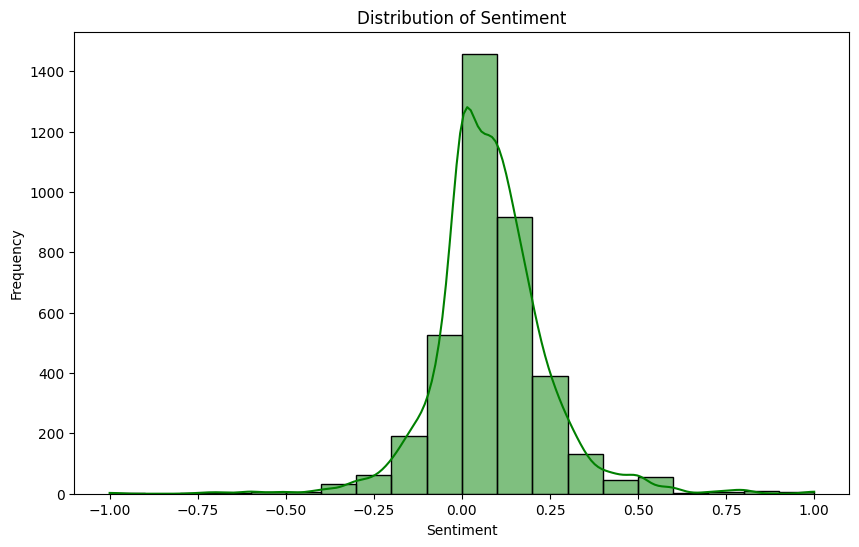

In [36]:
from textblob import TextBlob
df['sentiment'] = df['content'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Distribution of sentiment
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], bins=20, kde=True, color='green')
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

C:\Users\athar\AppData\Local\Temp\ipykernel_17584\2652715062.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cancer_type', y='sentiment', data=df, palette='viridis')


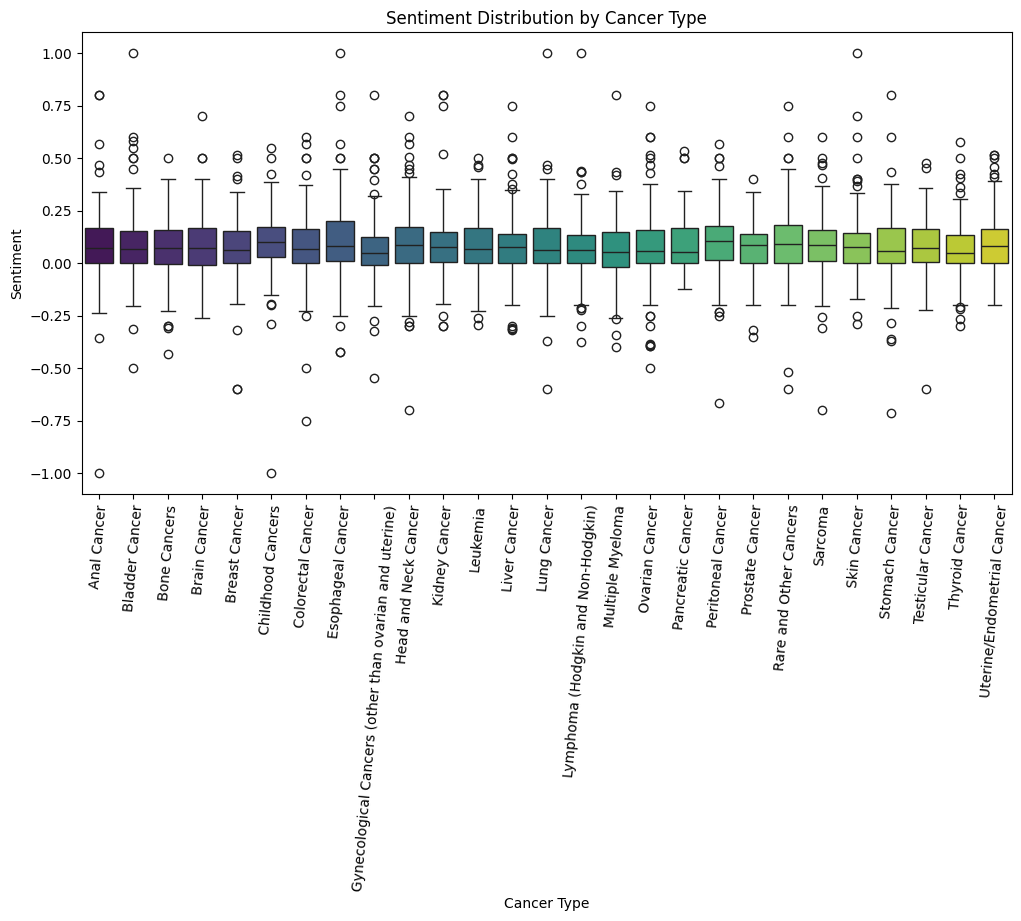

In [37]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='cancer_type', y='sentiment', data=df, palette='viridis')
plt.title('Sentiment Distribution by Cancer Type')
plt.xlabel('Cancer Type')
plt.ylabel('Sentiment')
plt.xticks(rotation=85)
plt.show()

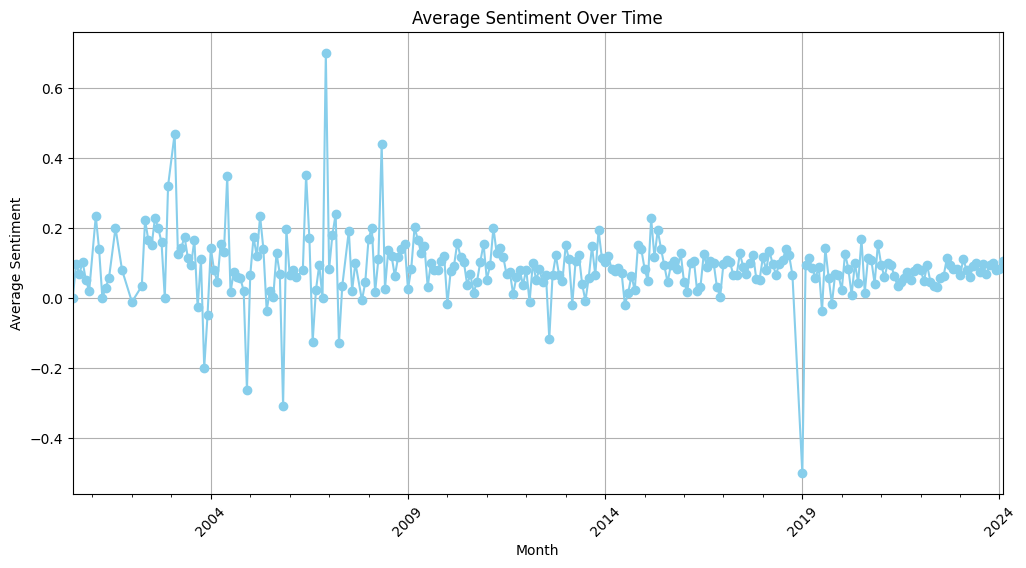

In [38]:
plt.figure(figsize=(12, 6))
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.to_period('M')
monthly_sentiment = df.groupby('month')['sentiment'].mean()
monthly_sentiment.plot(marker='o', color='skyblue')
plt.title('Average Sentiment Over Time')
plt.xlabel('Month')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [39]:
extreme_posts = df[(df['sentiment'] == df['sentiment'].max()) | (df['sentiment'] == df['sentiment'].min())]
print("Most Positive Post:")
print(extreme_posts[extreme_posts['sentiment'] == extreme_posts['sentiment'].max()]['content'].iloc[0])
print("\nMost Negative Post:")
print(extreme_posts[extreme_posts['sentiment'] == extreme_posts['sentiment'].min()]['content'].iloc[0])

Most Positive Post:
check anyone ha bcg immmunotherpy treatment best practice befoeduringafter treatment foodssupplements avoid pain

Most Negative Post:
doe anyone allergic reaction mosquito bite chemo mine horrible relief


In [30]:
from scipy.stats import ttest_ind

# Example: Compare sentiment between two cancer types
cancer_type1_sentiment = df[df['cancer_type'] == 'Cancer_Type_1']['sentiment']
cancer_type2_sentiment = df[df['cancer_type'] == 'Cancer_Type_2']['sentiment']

# Check for missing values
if cancer_type1_sentiment.isnull().any() or cancer_type2_sentiment.isnull().any():
    print("Error: Missing values detected in sentiment scores.")
else:
    # Check group sizes
    if len(cancer_type1_sentiment) < 2 or len(cancer_type2_sentiment) < 2:
        print("Error: Insufficient data for t-test.")
    else:
        # Calculate descriptive statistics
        print("Descriptive Statistics for Cancer Type 1:")
        print(cancer_type1_sentiment.describe())
        print("\nDescriptive Statistics for Cancer Type 2:")
        print(cancer_type2_sentiment.describe())

        # Plot histograms
        plt.figure(figsize=(10, 6))
        plt.hist(cancer_type1_sentiment, bins=20, alpha=0.5, label='Cancer Type 1', color='blue')
        plt.hist(cancer_type2_sentiment, bins=20, alpha=0.5, label='Cancer Type 2', color='orange')
        plt.title('Histogram of Sentiment Scores by Cancer Type')
        plt.xlabel('Sentiment Score')
        plt.ylabel('Frequency')
        plt.legend()
        plt.show()

        # Check variance
        print("\nVariance of Cancer Type 1:", cancer_type1_sentiment.var())
        print("Variance of Cancer Type 2:", cancer_type2_sentiment.var())

        # Perform t-test
        t_stat, p_value = ttest_ind(cancer_type1_sentiment, cancer_type2_sentiment, equal_var=False)
        print("\nT-statistic:", t_stat)
        print("P-value:", p_value)


Error: Insufficient data for t-test.


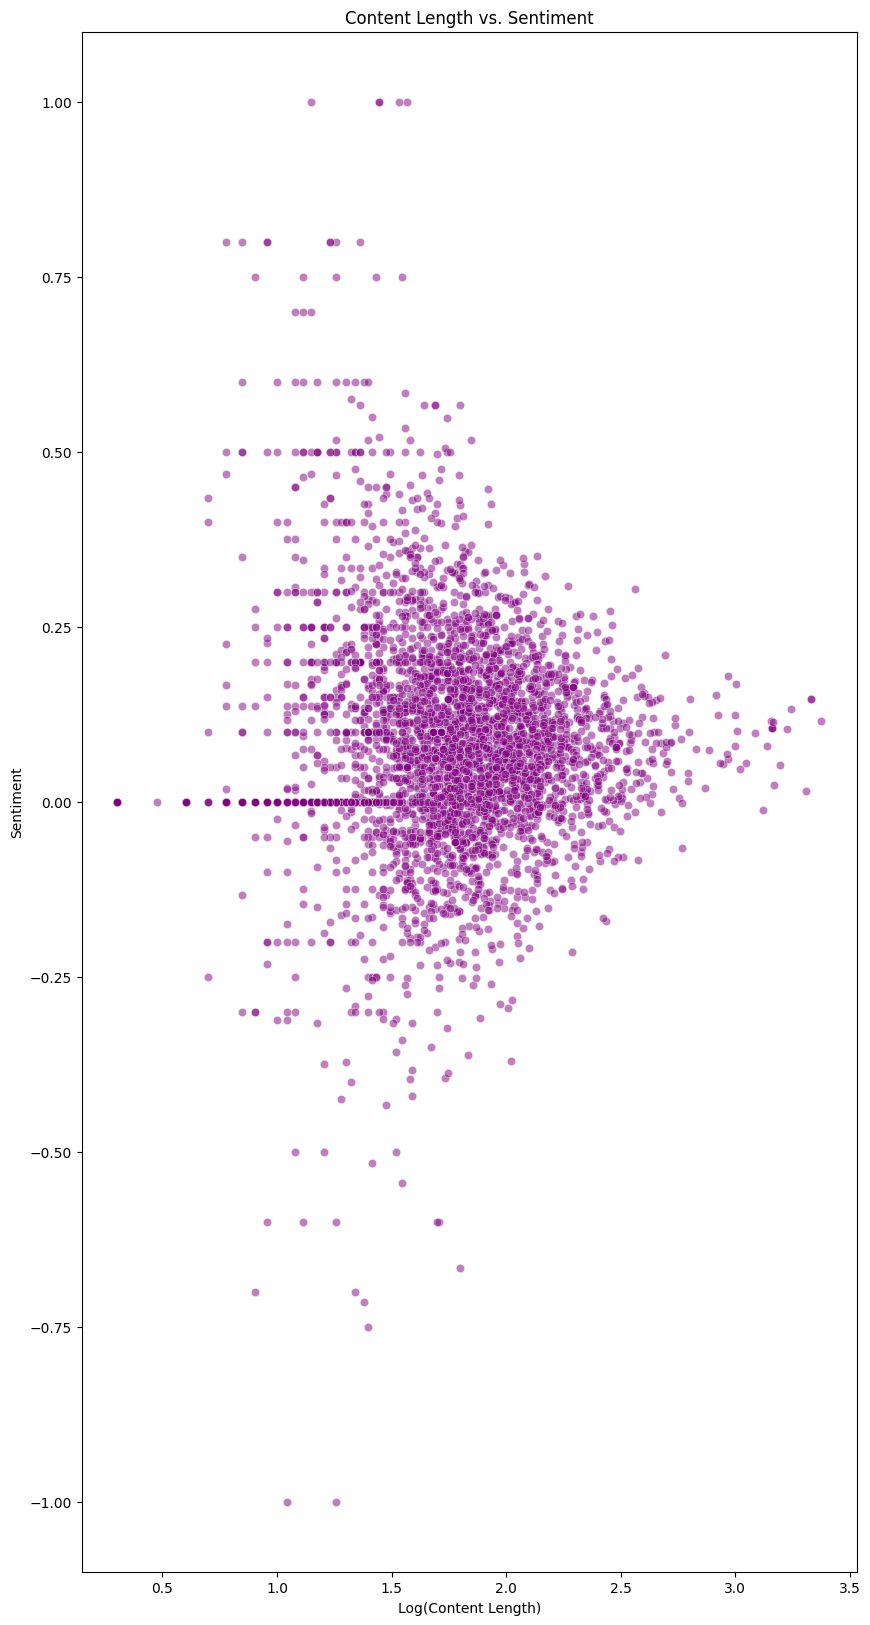

In [42]:
import seaborn as sns

# Logarithmic transformation of content length
df['log_content_length'] = np.log10(df['content_length'] + 1)  # Adding 1 to avoid log(0)
plt.figure(figsize=(10, 20))
sns.scatterplot(x='log_content_length', y='sentiment', data=df, color='purple', alpha=0.5)
plt.title('Content Length vs. Sentiment')
plt.xlabel('Log(Content Length)')
plt.ylabel('Sentiment')
plt.show()

In [43]:
# Calculate correlation coefficient
correlation_coefficient = df['log_content_length'].corr(df['sentiment'])

# Print correlation coefficient
print("Correlation Coefficient:", correlation_coefficient)

# Provide actionable insights
if correlation_coefficient > 0:
    print("There is a positive correlation between content length and sentiment.")
elif correlation_coefficient < 0:
    print("There is a negative correlation between content length and sentiment.")
else:
    print("There is no significant correlation between content length and sentiment.")

Correlation Coefficient: -0.027199919669964392
There is a negative correlation between content length and sentiment.


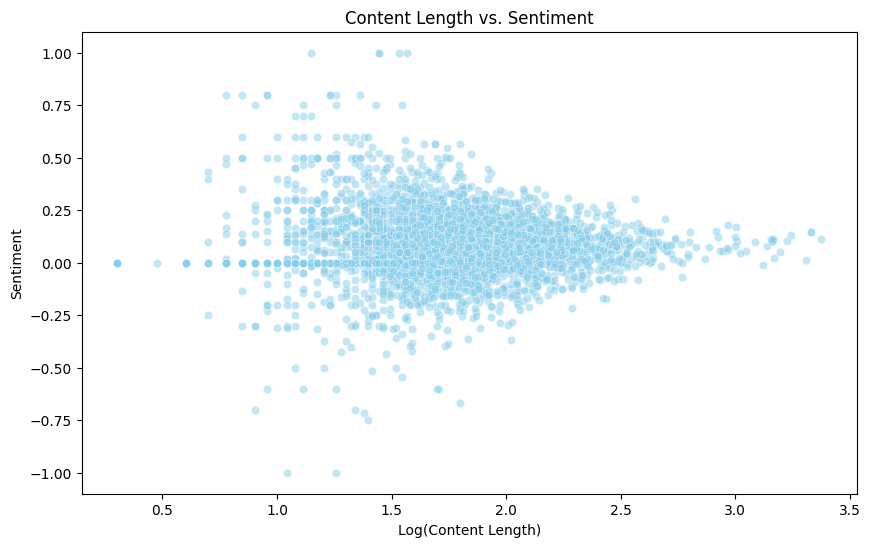

In [44]:
# 1. Identify Patterns or Trends
plt.figure(figsize=(10, 6))
sns.scatterplot(x='log_content_length', y='sentiment', data=df, color='skyblue', alpha=0.5)
plt.title('Content Length vs. Sentiment')
plt.xlabel('Log(Content Length)')
plt.ylabel('Sentiment')
plt.show()

In [45]:
# 2. Analyze Correlation
correlation_coefficient = df['log_content_length'].corr(df['sentiment'])
print("Correlation Coefficient:", correlation_coefficient)

Correlation Coefficient: -0.027199919669964392


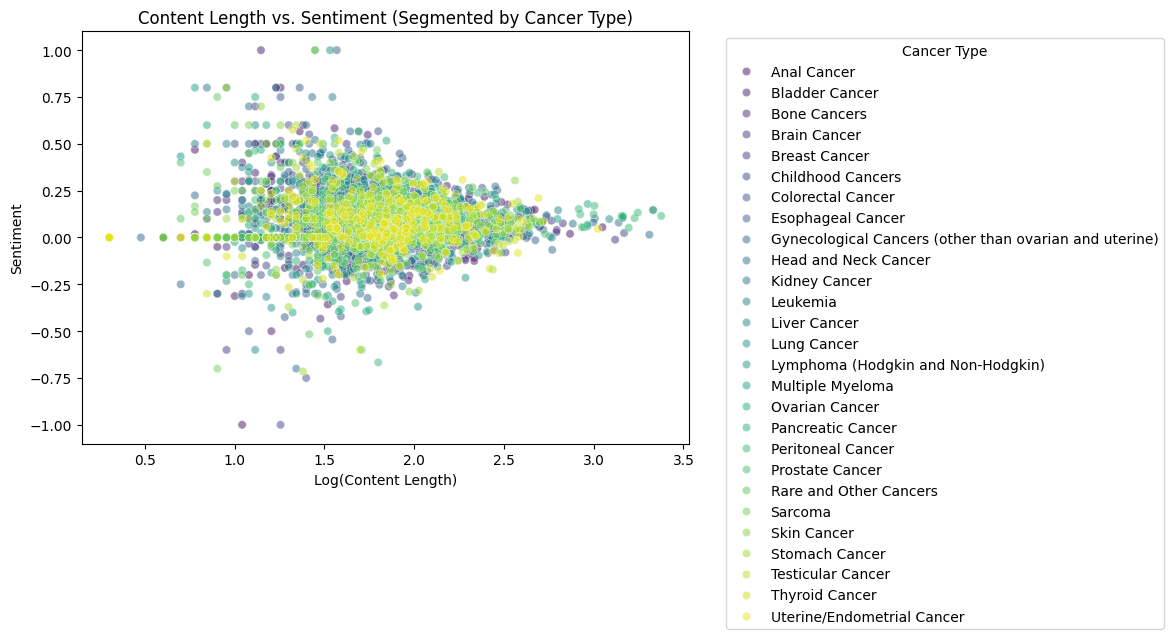

In [46]:
# 3. Segmentation Analysis
plt.figure(figsize=(12, 6))
scatter = sns.scatterplot(x='log_content_length', y='sentiment', hue='cancer_type', data=df, palette='viridis', alpha=0.5)
plt.title('Content Length vs. Sentiment (Segmented by Cancer Type)')
plt.xlabel('Log(Content Length)')
plt.ylabel('Sentiment')
plt.legend(title='Cancer Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()

In [47]:
# 4. Outlier Detection
outliers = df[(df['log_content_length'] > 2) & (df['sentiment'] > 0.5)]  # Example condition for outliers
print("Number of Outliers:", len(outliers))
print("Outlier Examples:")
print(outliers[['log_content_length', 'sentiment']].head())

Number of Outliers: 0
Outlier Examples:
Empty DataFrame
Columns: [log_content_length, sentiment]
Index: []
